# Isolation Forest

In [76]:
# завантажуємо усі необхідні бібліотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [77]:
df = pd.read_csv('bank-additional-full.csv', sep=';') # зчитуємо інформацію про банківську установу

In [78]:
df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [79]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [81]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [82]:
for col in df.columns:   # цикл для підрахунку елементів у стовпці
    print('-' * 45 + col + '-' * 45 , end='-')
    display(df[col].value_counts().head(10))

---------------------------------------------age----------------------------------------------

31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
Name: age, dtype: int64

---------------------------------------------job----------------------------------------------

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
Name: job, dtype: int64

---------------------------------------------marital----------------------------------------------

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

---------------------------------------------education----------------------------------------------

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

---------------------------------------------default----------------------------------------------

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

---------------------------------------------housing----------------------------------------------

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

---------------------------------------------loan----------------------------------------------

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

---------------------------------------------contact----------------------------------------------

cellular     26144
telephone    15044
Name: contact, dtype: int64

---------------------------------------------month----------------------------------------------

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

---------------------------------------------day_of_week----------------------------------------------

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

---------------------------------------------duration----------------------------------------------

90     170
85     170
136    168
73     167
124    164
87     162
72     161
104    161
111    160
106    159
Name: duration, dtype: int64

---------------------------------------------campaign----------------------------------------------

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
Name: campaign, dtype: int64

---------------------------------------------pdays----------------------------------------------

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
Name: pdays, dtype: int64

---------------------------------------------previous----------------------------------------------

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

---------------------------------------------poutcome----------------------------------------------

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

---------------------------------------------emp.var.rate----------------------------------------------

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

---------------------------------------------cons.price.idx----------------------------------------------

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
Name: cons.price.idx, dtype: int64

---------------------------------------------cons.conf.idx----------------------------------------------

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
Name: cons.conf.idx, dtype: int64

---------------------------------------------euribor3m----------------------------------------------

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
4.964    1175
1.405    1169
4.965    1071
4.864    1044
4.960    1013
Name: euribor3m, dtype: int64

---------------------------------------------nr.employed----------------------------------------------

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
Name: nr.employed, dtype: int64

---------------------------------------------y----------------------------------------------

no     36548
yes     4640
Name: y, dtype: int64

In [83]:
print(df.isnull().sum())  # підрахунок пропущених значень

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [146]:
# перевіряємо кількість елементів, які менше 0 у числових стовпцях

num_col = ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in num_col:
    print('-' * 45 + col + '-' * 45 , end='-')
    display(df[col][df[col] < 0 ].count() )

---------------------------------------------duration----------------------------------------------

0

---------------------------------------------campaign----------------------------------------------

0

---------------------------------------------pdays----------------------------------------------

0

---------------------------------------------previous----------------------------------------------

0

---------------------------------------------emp.var.rate----------------------------------------------

17191

---------------------------------------------cons.price.idx----------------------------------------------

0

---------------------------------------------cons.conf.idx----------------------------------------------

41188

---------------------------------------------euribor3m----------------------------------------------

0

---------------------------------------------nr.employed----------------------------------------------

0

Як можна помітити - негативні значення присутні у стовпцях "emp.var.rate" та "cons.conf.idx". Але це і не добре, і не погано. Ці значення лише коефіцієнти зміни зайнятості та індекси споживчих настроїв. Індекси можуть бути від'ємними, показуючи, що певний параметр клієнта змінився в гіршу сторону. Та навпаки - при додатному коефіцієнті у клієнта щось покращилось.

In [85]:
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

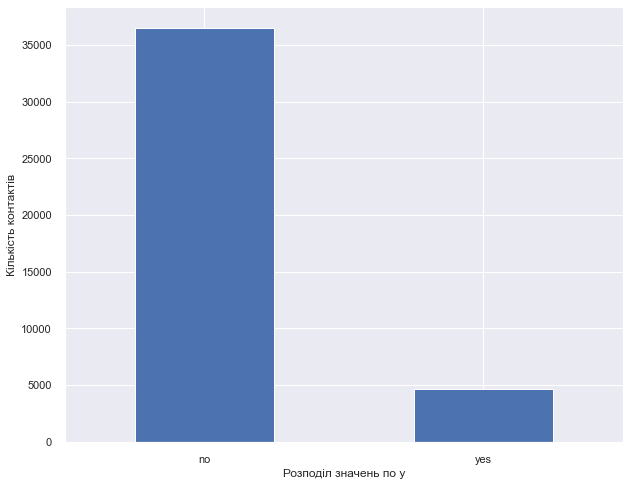

In [131]:
# стовпчаста діаграма кількості клієнтів по у

fig = plt.figure(figsize =(10, 8))

df['y'].value_counts().plot(kind='bar')

plt.ylabel("Кількість контактів")
plt.xlabel("Розподіл значень по у")
plt.xticks(rotation = 0)
plt.show()

# Заміна категоріальних даних на числові

In [87]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [147]:
df_1 = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'])  # кожне категоріальне значення виносимо в новий стовбець та відмічаємо 1, якщо у контакта це є, та 0 - якщо немає
df_1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [89]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

# Побудова моделі

In [90]:
from pycaret.anomaly import *

In [91]:
anom = setup(data = df_1, silent = True, session_id=3667)  # запускаємо бібліотеку та передаємо датасет

,Description,Value
0,session_id,3667
1,Original Data,"(41188, 65)"
2,Missing Values,False
3,Numeric Features,64
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(41188, 72)"
9,CPU Jobs,-1


In [92]:
anom_model = create_model(model = 'iforest', fraction = 0.05, max_features = 65, bootstrap = True, random_state=42)  # запускаємо модель Ізоляційного лісу та налаштовуємо параметри

In [93]:
anom_model

IForest(behaviour='new', bootstrap=True, contamination=0.05, max_features=65,
    max_samples='auto', n_estimators=100, n_jobs=-1, random_state=42,
    verbose=0)

In [94]:
results = assign_model(anom_model)  # призначаємо мітки аномалій набору даних для даної моделі

In [95]:
results.head(15)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,Anomaly,Anomaly_Score
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.101200
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.082346
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.110707
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.102116
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.071750
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.064927
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.104067
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.082989
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.093382
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.088448


In [96]:
results['Anomaly'].value_counts()

0    39128
1     2060
Name: Anomaly, dtype: int64

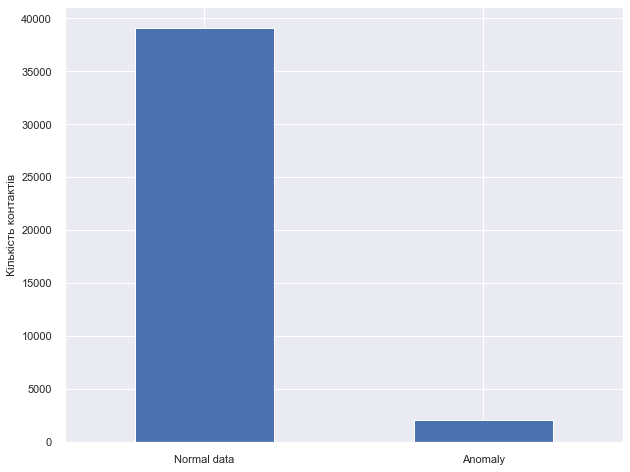

In [132]:
fig = plt.figure(figsize =(10, 8))
results['Anomaly'].value_counts().plot(kind='bar')

plt.ylabel("Кількість контактів")
plt.xticks([0, 1], ['Normal data', 'Anomaly'], rotation = 0)
plt.show()

In [98]:
# побудова Тривимірного графіку
plot_model(anom_model, plot = 'tsne')

In [99]:
# побудова Двовимірного графіку
plot_model(anom_model, plot = 'umap')

# Аналіз отриманих даних

In [100]:
results.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,Anomaly,Anomaly_Score
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.101200
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.082346
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.110707
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.102116
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,0,-0.071750


In [101]:
results_anom = results[results['Anomaly']==1]

In [102]:
results_anom.shape

(2060, 67)

In [103]:
results_anom[((results_anom['previous'] <= 0) & (results_anom['poutcome_success'] == 1)) | (results_anom['previous'] <= 0) & (results_anom['poutcome_failure'] == 1)]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,Anomaly,Anomaly_Score


In [104]:
results_anom[(results_anom['poutcome_nonexistent']==1) & (results_anom['previous']>=1)]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,Anomaly,Anomaly_Score


In [105]:
results_anom[(results_anom['duration']<=10) & (results_anom['campaign']<=1) & (results_anom['y_yes']==1)]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,Anomaly,Anomaly_Score


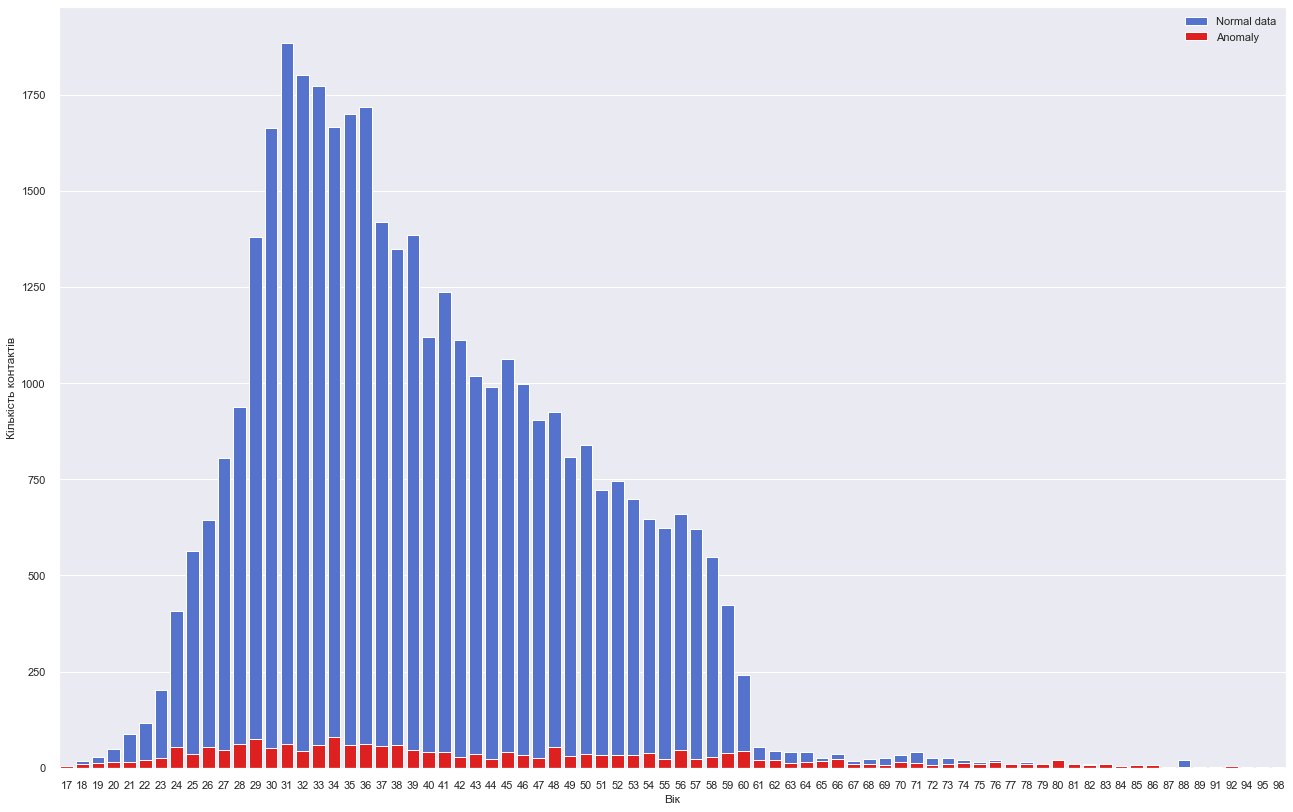

In [134]:
# будуємо графік відображення кількості аномалій з нормальними даними по віковій категорії
fig = plt.figure(figsize =(22, 14))

ax1 = sns.countplot(x='age', data=results, hue=results['Anomaly'], palette=['royalblue', 'red'], dodge=False)

plt.ylabel("Кількість контактів")
plt.xlabel("Вік")
plt.legend(labels=["Normal data", "Anomaly"], loc=1)
# plt.ylim(top=200)
plt.show()

In [107]:
results_anom[(results_anom['age']<18)]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,Anomaly,Anomaly_Score
37140,17,432,3,4,2,-2.9,92.201,-31.4,0.884,5076.2,...,0,0,1,0,0,1,1,0,1,0.031757
37539,17,182,2,999,2,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,1,0,0,1,0,1,0.027678
37558,17,92,3,4,2,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,1,1,0,1,0.054066
37579,17,498,2,999,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,1,0,0,0,1,1,0.069616
38274,17,896,1,2,2,-3.4,92.431,-26.9,0.742,5017.5,...,0,1,0,0,0,1,0,1,1,0.057582


In [108]:
results[(results['age']==88)]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,Anomaly,Anomaly_Score
27800,88,48,1,999,0,-1.8,92.843,-50.0,1.663,5099.1,...,0,0,1,0,1,0,1,0,0,-0.026591
27802,88,266,2,999,0,-1.8,92.843,-50.0,1.663,5099.1,...,0,0,1,0,1,0,0,1,0,-0.009771
27805,88,796,5,999,0,-1.8,92.843,-50.0,1.663,5099.1,...,0,0,1,0,1,0,0,1,1,0.026952
27808,88,96,6,999,0,-1.8,92.843,-50.0,1.663,5099.1,...,0,0,1,0,1,0,1,0,0,-0.022958
27810,88,126,1,999,0,-1.8,92.843,-50.0,1.663,5099.1,...,0,0,1,0,1,0,0,1,0,-0.014036
27811,88,323,1,999,0,-1.8,92.843,-50.0,1.663,5099.1,...,0,0,1,0,1,0,0,1,0,-0.011440
27812,88,85,1,999,0,-1.8,92.843,-50.0,1.663,5099.1,...,0,0,1,0,1,0,1,0,0,-0.027328
27813,88,101,7,999,0,-1.8,92.843,-50.0,1.663,5099.1,...,0,0,1,0,1,0,0,1,0,-0.008856
27814,88,103,3,999,0,-1.8,92.843,-50.0,1.663,5099.1,...,0,0,1,0,1,0,1,0,0,-0.000745
27815,88,82,2,999,0,-1.8,92.843,-50.0,1.663,5099.1,...,0,0,1,0,1,0,1,0,0,-0.002563


In [109]:
results_anom['Anomaly_Score'].describe()

count    2060.000000
mean        0.021240
std         0.017210
min         0.000012
25%         0.007547
50%         0.017466
75%         0.030526
max         0.091991
Name: Anomaly_Score, dtype: float64

In [110]:
results.groupby(['age', 'Anomaly']).mean()

duration  campaign       pdays  previous  emp.var.rate  \
age Anomaly                                                             
17  1        420.000000  2.200000  401.600000  1.800000     -3.000000   
18  0        317.055556  1.388889  999.000000  0.277778     -2.422222   
    1        330.300000  1.200000  106.200000  1.600000     -2.030000   
19  0        243.655172  2.551724  999.000000  0.310345     -1.817241   
    1        333.615385  1.692308  387.692308  1.461538     -1.984615   
...                 ...       ...         ...       ...           ...   
91  1        837.000000  1.000000  999.000000  2.000000     -3.400000   
92  1        527.500000  1.500000  252.750000  2.000000     -1.750000   
94  0        134.000000  1.000000  999.000000  1.000000     -3.400000   
95  0         85.000000  1.000000  999.000000  0.000000     -1.800000   
98  1        374.000000  1.500000  500.500000  1.000000     -3.400000   

             cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
age Anomaly                                                          
17  1             92.247000     -30.500000   0.846600  5064.460000   
18  0             92.912389     -37.177778   1.134611  5047.188889   
    1             93.624600     -39.350000   0.831600  5011.570000   
19  0             93.123724     -44.372414   1.383379  5083.689655   
    1             93.448077     -37.992308   0.927385  5017.838462   
...                     ...            ...        ...          ...   
91  1             92.379000     -29.800000   0.781000  5017.500000   
92  1             93.951500     -39.150000   0.796750  5000.150000   
94  0             92.649000     -30.100000   0.716000  5017.500000   
95  0             92.843000     -50.000000   1.650000  5099.100000   
98  1             92.431000     -26.900000   0.730000  5017.500000   

             job_admin.  ...  day_of_week_mon  day_of_week_thu  \
age Anomaly              ...                                     
17  1               0.0  ...         0.000000         0.000000   
18  0               0.0  ...         0.166667         0.333333   
    1               0.0  ...         0.000000         0.200000   
19  0               0.0  ...         0.275862         0.103448   
    1               0.0  ...         0.538462         0.153846   
...                 ...  ...              ...              ...   
91  1               0.0  ...         0.000000         0.000000   
92  1               0.0  ...         0.000000         0.250000   
94  0               0.0  ...         0.000000         0.000000   
95  0               0.0  ...         0.000000         1.000000   
98  1               0.0  ...         0.000000         0.000000   

             day_of_week_tue  day_of_week_wed  poutcome_failure  \
age Anomaly                                                       
17  1               0.200000         0.200000          0.400000   
18  0               0.277778         0.055556          0.166667   
    1               0.300000         0.300000          0.300000   
19  0               0.310345         0.068966          0.172414   
    1               0.153846         0.153846          0.230769   
...                      ...              ...               ...   
91  1               0.000000         1.000000          1.000000   
92  1               0.250000         0.500000          0.250000   
94  0               0.000000         1.000000          1.000000   
95  0               0.000000         0.000000          0.000000   
98  1               0.000000         0.000000          0.000000   

             poutcome_nonexistent  poutcome_success      y_no     y_yes  \
age Anomaly                                                               
17  1                    0.000000          0.600000  0.600000  0.400000   
18  0                    0.833333          0.000000  0.722222  0.277778   
    1                    0.000000          0.700000  0.300000  0.700000   
19  0                    0.827586          0.000

In [128]:
# перевіряємо бісеріальний коефіцієнт кореляції
col = results.columns[0:65]
l = len(col)
corr_dictionary = {}
cool_columns = []

for i in range(l):
    col_name = col[i]
    corr_dictionary[col_name] = stats.pointbiserialr(results['Anomaly'], results[col_name])
sort_corr_dictionary = sorted(corr_dictionary.items(), key=lambda x: abs(x[1][0]), reverse=True)
meaningful_corr_dictionary = []

for i in sort_corr_dictionary:
    meaningful_corr_dictionary.append((i[0], i[1]))

for i in meaningful_corr_dictionary:
    print("\033[1m", i[0], "\033[0m", ":", i[1])
    cool_columns.append(i[0])


print("Кількість фіч:", len(cool_columns))

 pdays  : PointbiserialrResult(correlation=-0.6339064707872706, pvalue=0.0)
 poutcome_success  : PointbiserialrResult(correlation=0.5989774092601919, pvalue=0.0)
 previous  : PointbiserialrResult(correlation=0.5695730768325018, pvalue=0.0)
 poutcome_nonexistent  : PointbiserialrResult(correlation=-0.5250378435738468, pvalue=0.0)
 nr.employed  : PointbiserialrResult(correlation=-0.3907214304657535, pvalue=0.0)
 y_no  : PointbiserialrResult(correlation=-0.34310835034521736, pvalue=0.0)
 y_yes  : PointbiserialrResult(correlation=0.34310835034521736, pvalue=0.0)
 euribor3m  : PointbiserialrResult(correlation=-0.323367758866492, pvalue=0.0)
 emp.var.rate  : PointbiserialrResult(correlation=-0.3022216392573017, pvalue=0.0)
 poutcome_failure  : PointbiserialrResult(correlation=0.2391716329240578, pvalue=0.0)
 month_oct  : PointbiserialrResult(correlation=0.19156658599903045, pvalue=0.0)
 month_sep  : PointbiserialrResult(correlation=0.15683412077034065, pvalue=4.646708166959956e-225)
 job_stu

# Побудова Графіків

In [113]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                    .idxmax(axis=1)
                    .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                    .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [114]:
results_und = undummify(results[results.columns[10:63]])
results_und.head()

,job,marital,education,default,housing,loan,contact,month,day,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,of_week_mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,of_week_mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,of_week_mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,of_week_mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,of_week_mon,nonexistent


In [115]:
df_und = pd.concat([results[results.columns[0:10]], results_und, df[df.columns[20]], results[results.columns[65:67]]], axis=1)
df_und.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,default,housing,loan,contact,month,day,poutcome,y,Anomaly,Anomaly_Score
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,no,no,no,telephone,may,of_week_mon,nonexistent,no,0,-0.101200
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,unknown,no,no,telephone,may,of_week_mon,nonexistent,no,0,-0.082346
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,no,yes,no,telephone,may,of_week_mon,nonexistent,no,0,-0.110707
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,no,no,no,telephone,may,of_week_mon,nonexistent,no,0,-0.102116
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,no,no,yes,telephone,may,of_week_mon,nonexistent,no,0,-0.071750


In [116]:
df_und['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

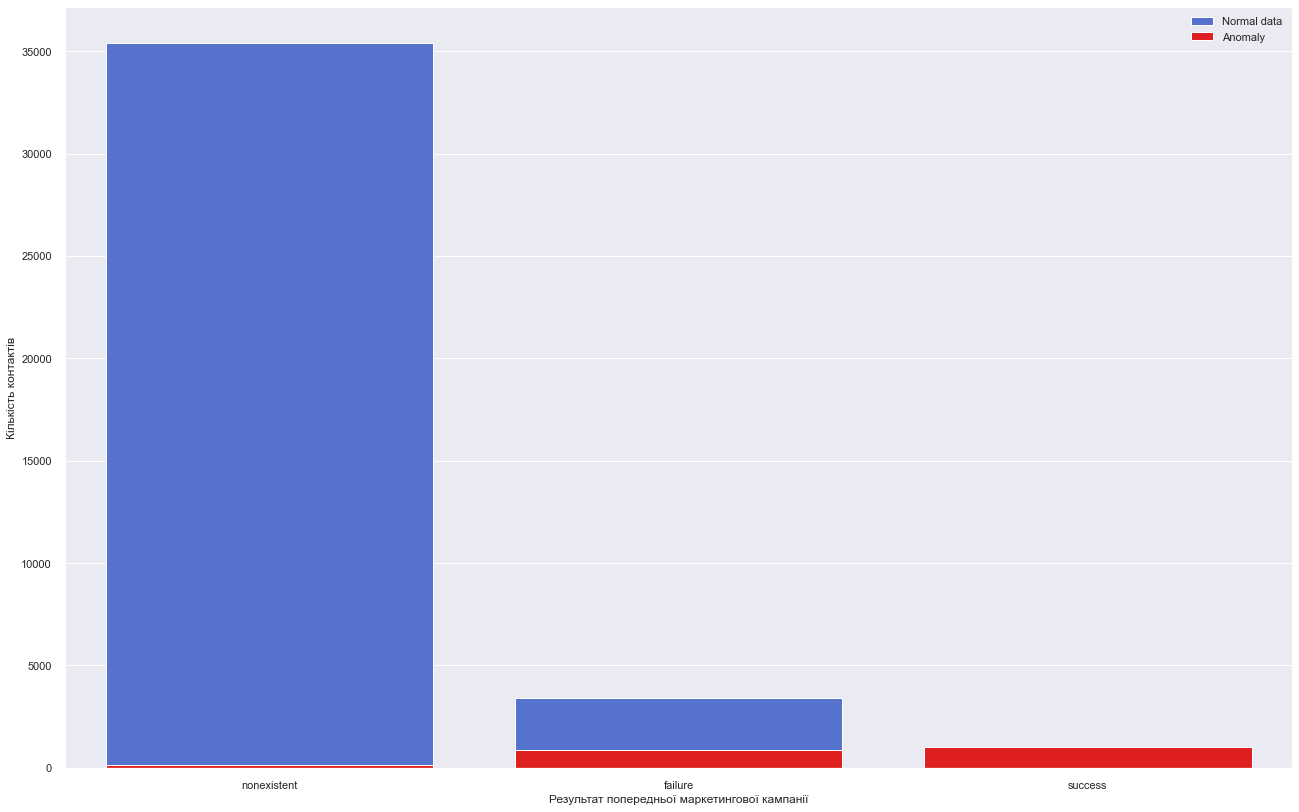

In [136]:
fig = plt.figure(figsize =(22, 14))

ax1 = sns.countplot(x='poutcome', data=df_und, hue=df_und['Anomaly'], palette=['royalblue', 'red'], dodge=False)

plt.ylabel("Кількість контактів")
plt.xlabel("Результат попередньої маркетингової кампанії")
plt.legend(labels=["Normal data", "Anomaly"])
plt.show()

In [118]:
df_und['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

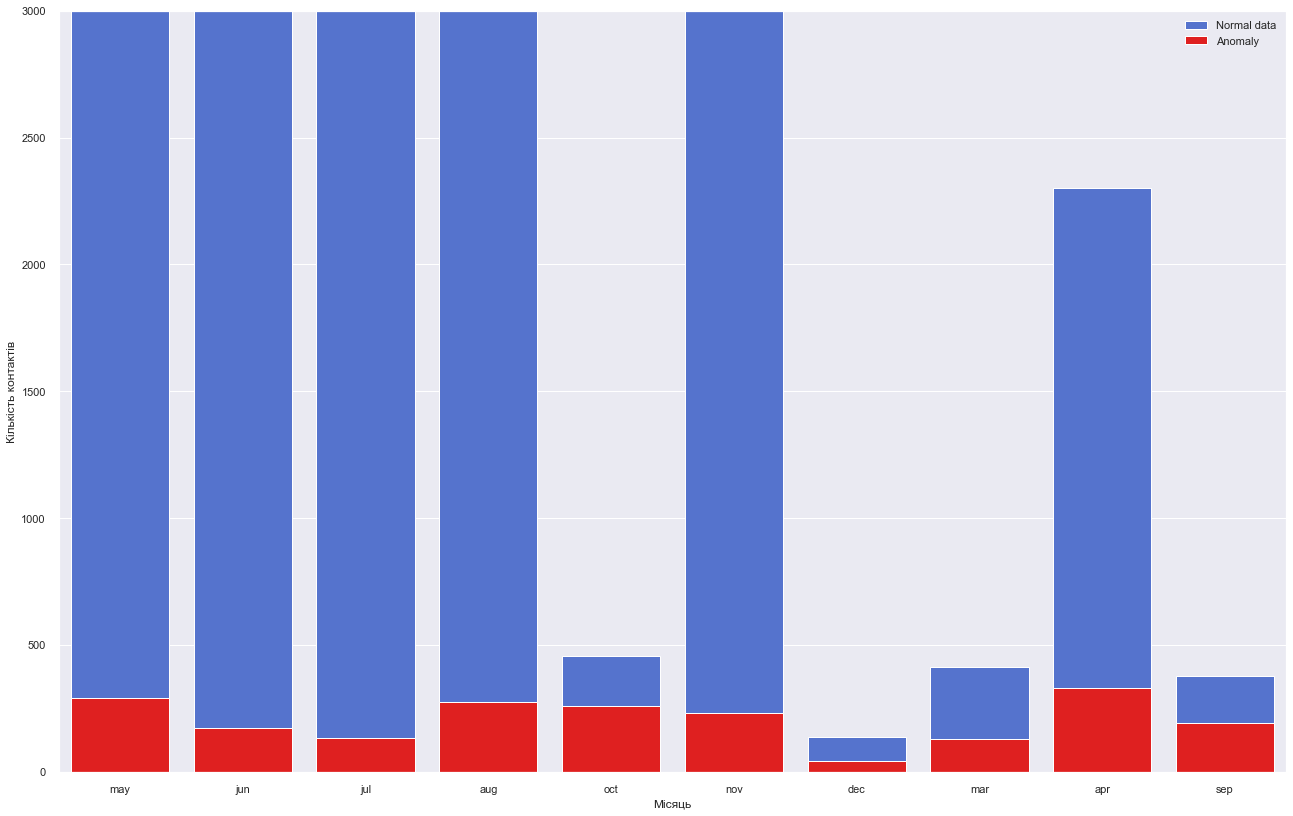

In [137]:
fig = plt.figure(figsize =(22, 14))

ax1 = sns.countplot(x='month', data=df_und, hue=df_und['Anomaly'], palette=['royalblue', 'red'], dodge=False)
plt.ylabel("Кількість контактів")
plt.xlabel("Місяць")
plt.legend(labels=["Normal data", "Anomaly"])
plt.ylim(top=3000)
plt.show()

In [120]:
df_und['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

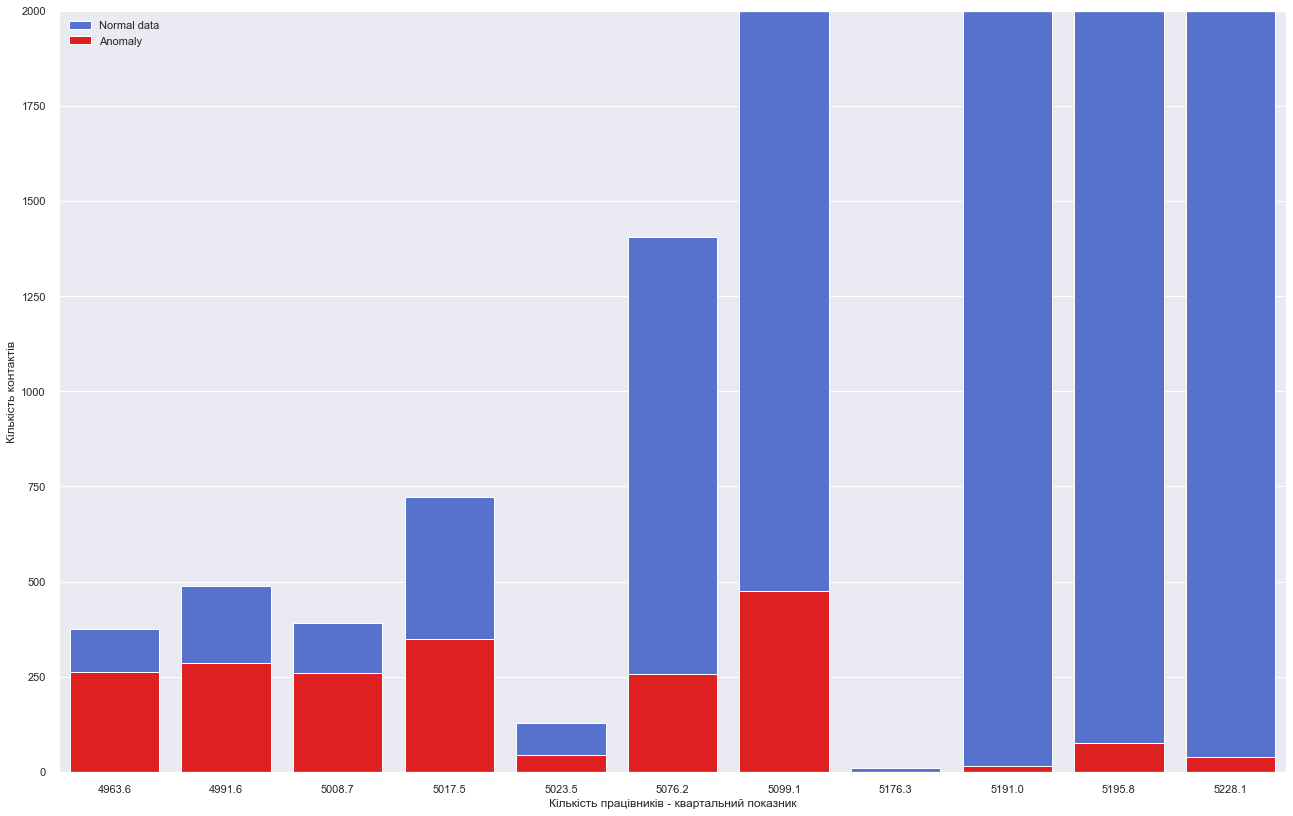

In [140]:
fig = plt.figure(figsize =(22, 14))

ax1 = sns.countplot(x='nr.employed', data=df_und, hue=df_und['Anomaly'], palette=['royalblue', 'red'], dodge=False)

plt.ylabel("Кількість контактів")
plt.xlabel("Кількість працівників - квартальний показник")
plt.legend(labels=["Normal data", "Anomaly"])
plt.ylim(top=2000)
plt.show()

In [122]:
results[results['nr.employed']==5176.3]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,Anomaly,Anomaly_Score
27680,31,36,1,999,0,-0.2,92.756,-45.9,3.816,5176.3,...,0,0,0,0,1,0,1,0,0,-0.091912
27681,39,11,1,999,1,-0.2,92.756,-45.9,3.743,5176.3,...,0,0,1,1,0,0,1,0,0,-0.019671
27682,41,18,1,999,0,-0.2,92.756,-45.9,3.669,5176.3,...,1,0,0,0,1,0,1,0,0,-0.047126
27683,37,12,1,999,0,-0.2,92.756,-45.9,3.563,5176.3,...,0,0,0,0,1,0,1,0,0,-0.105002
27684,48,291,1,999,0,-0.2,92.756,-45.9,3.563,5176.3,...,0,0,0,0,1,0,1,0,0,-0.072977
27685,51,170,1,999,0,-0.2,92.756,-45.9,3.488,5176.3,...,0,0,0,0,1,0,1,0,0,-0.067577
27686,39,183,1,999,0,-0.2,92.756,-45.9,3.428,5176.3,...,0,1,0,0,1,0,1,0,0,-0.097635
27687,36,234,1,999,0,-0.2,92.756,-45.9,3.329,5176.3,...,1,0,0,0,1,0,1,0,0,-0.127169
27688,55,136,1,999,0,-0.2,92.756,-45.9,3.282,5176.3,...,0,0,0,0,1,0,1,0,0,-0.053576
27689,44,119,1,999,0,-0.2,92.756,-45.9,3.053,5176.3,...,0,0,0,0,1,0,0,1,0,-0.050316


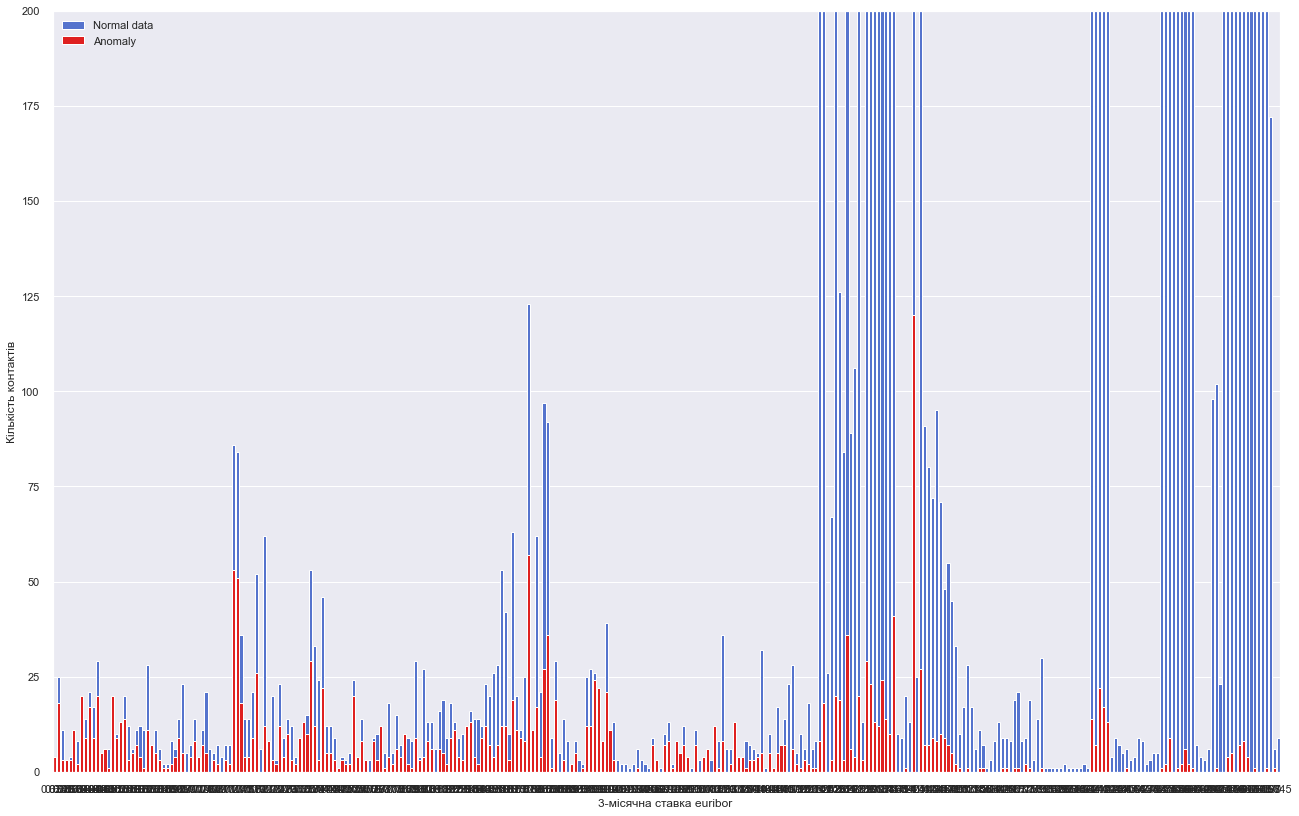

In [145]:
fig = plt.figure(figsize =(22, 14))

ax1 = sns.countplot(x='euribor3m', data=df_und, hue=df_und['Anomaly'], palette=['royalblue', 'red'], dodge=False)

plt.ylabel("Кількість контактів")
plt.xlabel("3-місячна ставка euribor ")
plt.legend(labels=["Normal data", "Anomaly"])
plt.ylim(top=200)
plt.show()

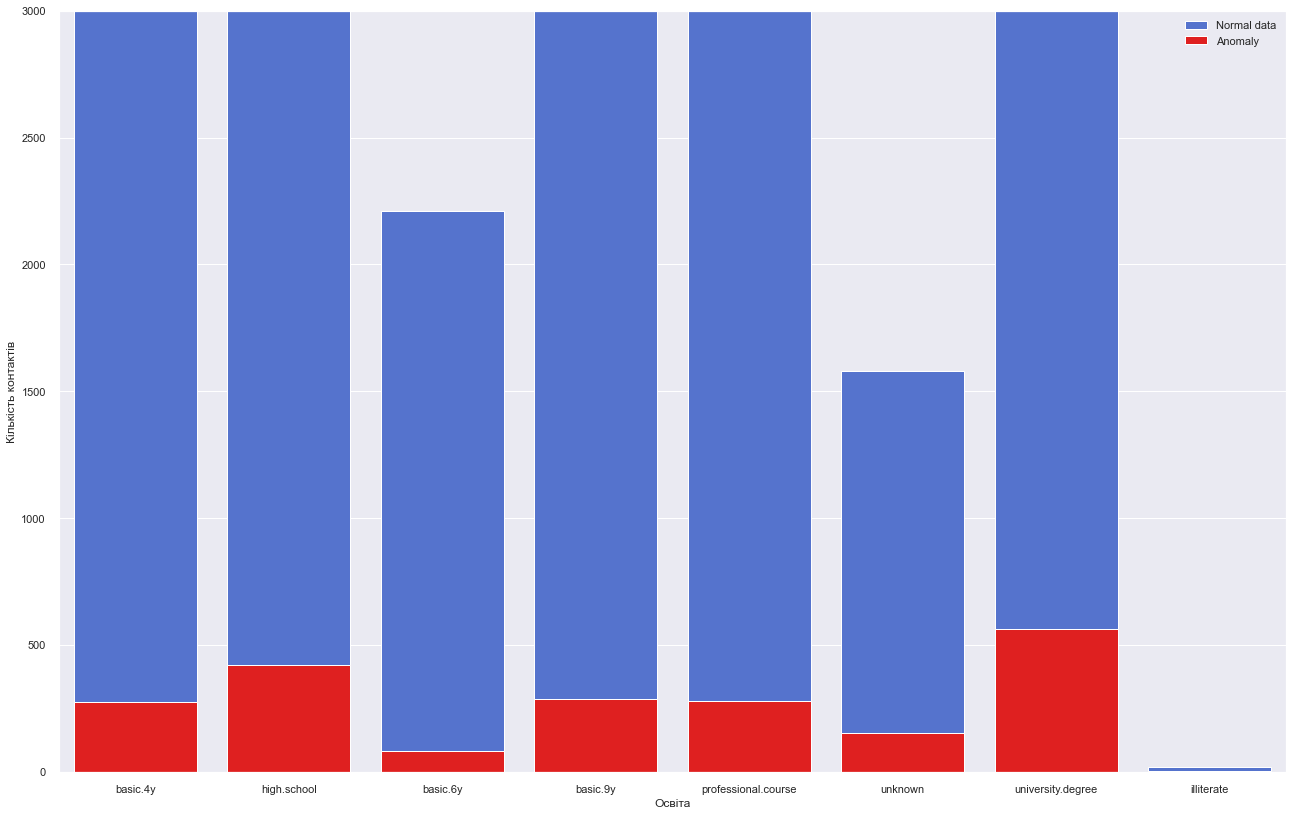

In [144]:
fig = plt.figure(figsize =(22, 14))

ax1 = sns.countplot(x='education', data=df_und, hue=df_und['Anomaly'], palette=['royalblue', 'red'], dodge=False)

plt.ylabel("Кількість контактів")
plt.xlabel("Освіта")
plt.legend(labels=["Normal data", "Anomaly"])
plt.ylim(top=3000)
plt.show()